ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **22Nov20**

# 16. Non-Linear Least-Squares Arrhenius Rate Constant Data Fitting
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Jmtrx}{\boldsymbol{\mathsf{J}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\kvec}{\boldsymbol{\mathsf{k}}}
  \newcommand{\alphabf}{\boldsymbol{\alpha}}
  \newcommand{\betabf}{\boldsymbol{\beta}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Non-Linear Arrhenius Data Fitting](#adf)
* [Experimental Data (10 points)](#ed10)
 * [Non-Linear System](#nls10)
 * [NLLS Newton's Method Data Fitting](#nlls10)
 * [Goodness of Fit](#gof10)
 * [Objective Function](#of10)
* [Experimental Data (20 points)](#ed20)
 * [Non-Linear System](#nls20)
 * [NLLS Newton's Method Data Fitting](#nlls20)
 * [Goodness of Fit](#gof20)
 * [Objective Function](#of20)
* [Experimental Data (80 points)](#ed80)
 * [Non-Linear System](#nls80)
 * [NLLS Newton's Method Data Fitting](#nlls80)
 * [Objective Function](#of80)
* [Results Comparison](#res)
---

## [Introduction](#toc)<a id="intro"></a>
The non-linear least-squares method is an extension of the linear least-squares method, covered earlier in this course, to treat non-linear objective functions. Therefore Newton's method, also covered earlier, will be needed to solve an iterative version of the normal equations similarly obtained in the linear case. The theoretical notes we will need for this topic can be found in the course notes OneNote [ChEn-3170-nllsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EpCvarQjfDZFnkQVnuc7Q6wB_GoMnjgiCkIaL04_5STOvQ?e=VH3v7W). 

### [Non-linear Arrhenius Data Fitting](#toc)<a id="adf"></a>

This notebook will apply the previous developments in the course to fit experimental data to a non-linear model directly. Here the example is the Arrhenius function for the dependency of the reaction rate constant on temperature, namely

\begin{equation*}
k(\beta) = k_0 \, e^{-\beta\,E_\text{a}}.
\end{equation*}

Therefore the methods and results here are to be compared to its linear counterpart in Notebook 10.

The pre-exponential factor (frequency parameter), $k_0$, and the energy of activation, $E_\text{a}$, are the sought parameters in this expression. These parameters will be computed by direct minimization of the non-linear residual of the differences between the values measured for $k_i$ and the predicted values of the Arrhenius function for all values of $\beta_i$. To that end, evaluate the residuals, $r_i$, of the Arrhenius formula at each experimental point $(\beta_i,k_i)$

\begin{equation*}
r_i = k_i - k(\beta_i) = k_i - k_0\,e^{-\beta_i\,E_a}.
\end{equation*}

If the residual vector is denoted

$\rvec = \begin{pmatrix}
 r_1 \\ 
 r_2 \\ 
 \vdots  \\ 
 r_m \\ 
\end{pmatrix}$, and the vector of parameters $\alphabf = \begin{pmatrix}
 k_0 \\ 
 E_a 
\end{pmatrix}$, then find the optimum vector of parameters $\alphabf^*$ such that it minimizes the
objective function

\begin{equation*}
 \phi(\alpha^*) = \min\limits_{\alphabf} \norm{\rvec(\alpha)}^2 \quad\  \forall \quad\ \alphabf.
\end{equation*}

Note that $\rvec$ is a vector-valued function of $\alphabf$.
Find the optimal value $\alphabf^*$ using Newton's method iterations on
the vector function leading to the minimum point of the objective function, that is, starting with an initial guess $\alphabf^{(0)}$ compute the 
sequence $\alphabf^{(k)}, k = 1\ldots N_\text{max}$ solving the Jacobian normal equations

\begin{equation*}
{\Jmtrx^{(k-1)}}^\top\Jmtrx^{(k-1)}\,\delta\alphabf = -\Jmtrx^\top\rvec^{(k-1)} ,
\end{equation*}

where $\Jmtrx^{(k-1)} := \partial_\alphabf\rvec^{(k-1)} = \begin{pmatrix}
  -e^{-\beta_1 E_a^{(k-1)}} & k_0^{(k-1)}\, \beta_1 e^{-\beta_1 E_a^{(k-1)}}   \\
  -e^{-\beta_2 E_a^{(k-1)}} & k_0^{(k-1)}\, \beta_2 e^{-\beta_2 E_a^{(k-1)}} \\
  \vdots  & \vdots \\
  -e^{-\beta_m E_a^{(k-1)}} & k_0^{(k-1)}\, \beta_m e^{-\beta_m E_a^{(k-1)}}
 \end{pmatrix}$, and 
 $\alphabf^{(k)} = \alphabf^{(k-1)} + \delta\alphabf$,
 
 until $\norm{\delta\alphabf^{(k)}}$ is less than a small value.

## [Experimental Data (10 points)](#toc)<a id="ed10"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/tree/master/notebooks/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_10pts.dat`:
```
#(T,k) [K x 1/s]
r_cte = 8.314 [J/(mol.K)]
n_pts = 10
3.00000e+02 6.79538e-01
3.22222e+02 7.08972e-01
3.44444e+02 6.34251e-01
3.66667e+02 7.25196e-01
3.88889e+02 6.59508e-01
4.11111e+02 7.42922e-01
4.33333e+02 6.65461e-01
4.55556e+02 7.01082e-01
4.77778e+02 6.74563e-01
5.00000e+02 7.98533e-01
```

In [1]:
'''Function: read experimental data'''

def read_experimental_data(filename):
    import io                     # import io module
    finput = open(filename, 'rt') # create file object

    import numpy as np

    for line in finput:
    
        line = line.strip() # original line
    
        if line[0] == '#': # skip comments in the file
            continue
        
        var_line = line.split(' = ') # variable line
    
        if var_line[0] == 'r_cte':
            r_cte = float(var_line[1].split(' ')[0])
            r_cte_units = var_line[1].split(' ')[1]
        elif var_line[0] == 'n_pts':
            n_pts = int(var_line[1])
            temp  = np.zeros(n_pts) # reserve space
            k_cte = np.zeros(n_pts) # reserve space
            idx   = 0 # counter
        else:
            data = line.split(' ') # original line
            temp[idx]  = float(data[0])
            k_cte[idx] = float(data[1])
            idx += 1
            
    return (r_cte, r_cte_units, n_pts, temp, k_cte)

In [2]:
'''Read experimental data'''

import numpy as np
(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_10pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  10
T = [300.   322.22 344.44 366.67 388.89 411.11 433.33 455.56 477.78 500.  ]
k = [0.64 0.65 0.67 0.67 0.71 0.7  0.69 0.7  0.75 0.76]


In [3]:
'''Function: plot experimental data'''

def plot_experimental_data(temp, k_cte):
    
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(7, 7))

    plt.plot(temp, k_cte,'r*',label='experimental')
    
    plt.xlabel(r'$T$ [K]',fontsize=14)
    plt.ylabel(r'$k$ [s$^{-1}$]',fontsize=14)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()
    
    return

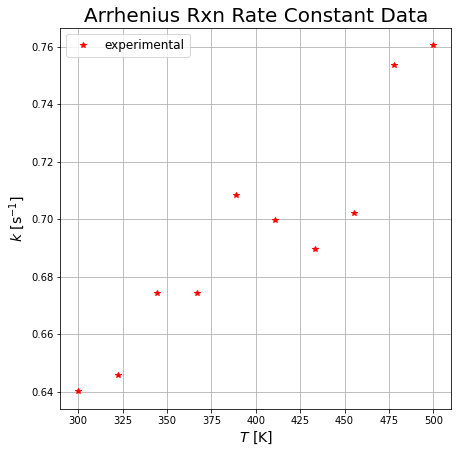

In [4]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### [Non-linear System](#toc)<a id="nls10"></a>

Evaluate the residuals, $r_i, i =1,\ldots m$, of the Arrhenius fit function at each experimental point

\begin{equation*}
r_i = k_i - f(\beta_i,\alphabf),
\end{equation*}

and form the residual vector $\rvec = \begin{pmatrix}
 r_1 \\ 
 r_2 \\ 
 \vdots  \\ 
 r_m \\ 
\end{pmatrix} $.

This should be done in elementary steps, first define the fit function

\begin{equation*}
f(\beta,\alphabf) =  k_0\,e^{-\beta\,E_a}.
\end{equation*}

Then evaluate the fit function at the $\beta_i$ data points to form the fit vector function

\begin{equation*}
f_i(\alphabf) = f(\beta_i,\alphabf)
\end{equation*}

$\fvec = \begin{pmatrix}
 f_1 \\ 
 f_2 \\ 
 \vdots  \\ 
 f_m \\ 
\end{pmatrix} $.

This should be done in one implementation as shown in the `arrhenius_func`. This allows a simple assembly of the residual vector using the $k_i$ values in a vector operation

\begin{equation*}
\rvec = \kvec - \fvec .
\end{equation*}

In [5]:
'''Function: Arrhenius fit function'''

def arrhenius_func(beta_vec, param_vec):
    
    import numpy as np
    
    k0 = param_vec[0]
    ea = param_vec[1]
    
    k = k0 * np.exp(-beta_vec*ea)
    
    return k

Next, build the elements needed to allow for the construction of the Jacobian matrix

$\Jmtrx = \partial_\alphabf\rvec =  - \partial_\alphabf\fvec = - \partial_\alphabf f(\betabf;\alphabf)$. Assemble the Jacobian column by column as follows. 

   + First column: $\Jmtrx_{\bullet,1} = -\partial_{\alpha_1}\fvec = - \partial_{\alpha_1}f(\betabf;\alphabf)$
   + Second column: $\Jmtrx_{\bullet,2} = -\partial_{\alpha_2}\fvec = - \partial_{\alpha_2}f(\betabf;\alphabf)$

To compute the gradient of the fit **vector** function, $\fvec$,
first implement the gradient of the **scalar** fit function, $f$, evaluated at the $\betabf$ vector

$ \begin{pmatrix}
  \partial_{\alpha_1}f(\betabf;\alphabf) \\ 
  \partial_{\alpha_2}f(\betabf;\alphabf)  
\end{pmatrix} 
=
\begin{pmatrix}
  \partial_{k_0}f(\betabf;\alphabf) \\ 
  \partial_{E_a}f(\betabf;\alphabf)  
\end{pmatrix}
=
\begin{pmatrix}
  e^{-\beta_1\,E_a}, \ldots, e^{-\beta_m\,E_a} \\ 
  -k_0\,\beta_1\,e^{-\beta_1\,E_a}, \ldots, -k_0\,\beta_m\,e^{-\beta_m\,E_a}
\end{pmatrix}
$.

This is effectively the transpose of $\Jmtrx$.

In [6]:
'''Function: Arrhenius parameter gradient'''

def partial_p_arrhenius_func(beta_vec, param_vec):
    
    import numpy as np
    
    k0 = param_vec[0]  # parameter 0: p0
    ea = param_vec[1]  # parameter 1: p1
    
    partial_p0_f =  np.exp(-beta_vec*ea)             # evaluated at all beta values
    partial_p1_f = -k0*beta_vec*np.exp(-beta_vec*ea) # evaluated at all beta values
    
    # Columns of the Jacobian matrix (column 0, column 1)
    return (partial_p0_f, partial_p1_f)

The Jacobian matrix can be assembled simply from the gradient of the fit function, `partial_p_arrhenius_func`, directly

$\Jmtrx = \partial_\alphabf\rvec =  - \partial_\alphabf\fvec = - \begin{pmatrix}
  \partial_{\alpha_1}f(\beta_1,\alphabf) & \partial_{\alpha_2}f(\beta_1,\alphabf)   \\
  \partial_{\alpha_1}f(\beta_2,\alphabf) & \partial_{\alpha_2}f(\beta_2,\alphabf) \\
  \vdots  & \vdots \\
  \partial_{\alpha_1}f(\beta_m,\alphabf) & \partial_{\alpha_2}f(\beta_m,\alphabf)
 \end{pmatrix}$.
 
This is easier than programming the construction of the Jacobian matrix directly as
 
$\Jmtrx = \partial_\alphabf\rvec =  - \partial_\alphabf\fvec = - \begin{pmatrix}
  e^{-\beta_1 E_a} & -k_0\, \beta_1 e^{-\beta_1 E_a}   \\
  e^{-\beta_2 E_a} & -k_0\, \beta_2 e^{-\beta_2 E_a} \\
  \vdots  & \vdots \\
  e^{-\beta_m E_a} & -k_0\, \beta_m e^{-\beta_m E_a}
 \end{pmatrix}$.

### [Non-Linear Least-Squares Newton's Method Data Fitting](#toc)<a id="nlls10"></a>

Find the optimal value $\alphabf^*$ using Newton's method iterations on
the linearized residual vector, that is, starting with an initial guess $\alphabf^{(0)}$ compute the 
sequence $\alphabf^{(k)}, k = 1\ldots N_\text{max}$ solving the normal equations

\begin{equation*}
{\Jmtrx^{(k-1)}}^\top\Jmtrx^{(k-1)}\,\delta\alphabf = -\Jmtrx^\top\rvec^{(k-1)} ,
\end{equation*}

where $\Jmtrx^{(k-1)} =  \begin{pmatrix}
  -e^{-\beta_1 E_a^{(k-1)}} & k_0^{(k-1)}\, \beta_1 e^{-\beta_1 E_a^{(k-1)}}   \\
  -e^{-\beta_2 E_a^{(k-1)}} & k_0^{(k-1)}\, \beta_2 e^{-\beta_2 E_a^{(k-1)}} \\
  \vdots  & \vdots \\
  -e^{-\beta_m E_a^{(k-1)}} & k_0^{(k-1)}\, \beta_m e^{-\beta_m E_a^{(k-1)}}
 \end{pmatrix}$, and 
 $\alphabf^{(k)} = \alphabf^{(k-1)} + \delta\alphabf$,
 
 until $\norm{\delta\alphabf^{(k)}}$ and $\norm{\Jmtrx^\top\rvec^{(k)}}$ are less than a small value.

In [7]:
def newton_solve(x_vec, y_vec, 
                 fit_func, partial_p_fit_func,
                 param_vec_0,
                 k_max=10, tolerance=1.0e-8, verbose=True):

    assert x_vec.size == y_vec.size
    
    import numpy as np
    import numpy.linalg
    
    try:    
        from chen_3170.toolkit import solve   
    except ModuleNotFoundError:
        assert False, 'You need to provide your own solve function here. Bailing out.'
    
    # Other initialization
    delta_vec_k = np.ones(param_vec_0.size, dtype=np.float64)*1e10
    r_vec_k     = np.ones(x_vec.size, dtype=np.float64)*1e10
    j_mtrx_k    = np.ones((x_vec.size, param_vec_0.size),dtype=np.float64)*1e10
    param_vec   = np.copy(param_vec_0)
    
    if verbose is True:
        print('\n')
        print('**************************************************************************')
        print("                      Newton's Method Iterations                          ")
        print('**************************************************************************')
        print('k  ||r(p_k)||  ||J(p_k)||  ||J^T r(p_k)||  ||del p_k||   ||p_k||  |convg| ')
        print('--------------------------------------------------------------------------')
        #         1234567890 12345678901 123456789012345 123456789012 123456789 12345678
        
    import math
    assert k_max >= 1
    k = 1
    
    while (np.linalg.norm(delta_vec_k) > tolerance or np.linalg.norm(j_mtrx_k.transpose()@r_vec_k) > tolerance) and k <= k_max:
        
        # Build the residual vector
        r_vec_k = y_vec - fit_func(x_vec, param_vec)
        
        # Build the columns of the Jacobian matrix
        partial_p_f = partial_p_fit_func(x_vec, param_vec)
        
        # Assemble the Jacobian matrix
        j_mtrx_k = np.zeros((x_vec.size, param_vec.size), dtype=np.float64) # allocate space
        
        for (i, partial_p_f_i) in enumerate(partial_p_f):
            j_mtrx_k[:, i] = - partial_p_f_i
        
        delta_vec_k_old = delta_vec_k
        
        #delta_vec_k = solve( j_mtrx_k.transpose()@j_mtrx_k, -j_mtrx_k.transpose()@r_vec_k )
        delta_vec_k = numpy.linalg.solve( j_mtrx_k.transpose()@j_mtrx_k, -j_mtrx_k.transpose()@r_vec_k )
        
        r_vec_k_old = r_vec_k
        step_size = 1.0
        r_vec_k = y_vec - fit_func(x_vec, param_vec+delta_vec_k)
        
        n_steps_max = 5
        n_steps = 0
        while (np.linalg.norm(r_vec_k) > np.linalg.norm(r_vec_k_old)) and n_steps <= n_steps_max:
            step_size *= 0.5
            #print('step reduced')
            r_vec_k = y_vec - fit_func( x_vec, param_vec + step_size*delta_vec_k)
            n_steps += 1
        
        param_vec += step_size * delta_vec_k
        
        if k > 0:
            if np.linalg.norm(delta_vec_k) != 0.0 and np.linalg.norm(delta_vec_k_old) != 0.0:
                convergence_factor = math.log(np.linalg.norm(delta_vec_k),10) / math.log(np.linalg.norm(delta_vec_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        if verbose is True:
            print('%2i %+10.2e %+11.2e %+15.2e %+12.2e %+9.2e %8.2f'%\
                  (k,np.linalg.norm(r_vec_k),np.linalg.norm(j_mtrx_k), np.linalg.norm(j_mtrx_k.transpose()@r_vec_k),
                   np.linalg.norm(delta_vec_k), np.linalg.norm(param_vec), convergence_factor) )
            
        k = k + 1
        
    if verbose is True:
        print('******************************************************') 
        print('Root = ',param_vec)
    
    return param_vec

In [8]:
k_0      = 1.0
energy_a = 0.0

beta_vec = 1./r_cte/temp_vec

param_vec_0 = np.array([k_0, energy_a])

k_max = 8
tolerance = 1.0e-6

param_vec = newton_solve(beta_vec, k_cte_vec, 
                         arrhenius_func, partial_p_arrhenius_func,
                         param_vec_0, k_max, tolerance)

k_0      = param_vec[0]
energy_a = param_vec[1]

print('k_0 = %8.5e [1/s]  '%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)



**************************************************************************
                      Newton's Method Iterations                          
**************************************************************************
k  ||r(p_k)||  ||J(p_k)||  ||J^T r(p_k)||  ||del p_k||   ||p_k||  |convg| 
--------------------------------------------------------------------------
 1  +1.36e-01   +3.16e+00       +3.90e-01    +6.78e+02 +6.78e+02     0.28
 2  +4.86e-02   +2.57e+00       +4.88e-03    +2.95e+02 +9.72e+02     0.87
 3  +4.85e-02   +2.35e+00       +6.25e-05    +1.96e+01 +9.92e+02     0.52
 4  +4.85e-02   +2.33e+00       +8.97e-09    +1.60e-01 +9.92e+02    -0.62
 5  +4.85e-02   +2.33e+00       +3.02e-13    +1.14e-03 +9.92e+02     3.70
 6  +4.85e-02   +2.33e+00       +3.12e-16    +8.10e-06 +9.92e+02     1.73
 7  +4.85e-02   +2.33e+00       +6.22e-16    +5.76e-08 +9.92e+02     1.42
******************************************************
Root =  [9.43e-01 9.92e+02]
k_0 = 9.42649e-01 [1/s

In [9]:
'''Function: plot the fit in the Cartesian plane'''

def plot_fit(r_cte, temp,k_cte, k_0, energy_a):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(6, 6))

    # plot experimental data
    plt.plot(temp, k_cte,'r*',label='experimental')

    # plot Arrhenius expression
    n_plot_pts = 100
    temp_plot = np.linspace( temp[0], temp[-1], n_plot_pts)
    k_plot    = k_0 * np.exp(-energy_a/temp_plot/r_cte) # Arrhenius expression
    
    plt.plot(temp_plot,k_plot,'b-',label='LS fitting' )

    plt.xlabel(r'$T$ [K]',fontsize=16)
    plt.ylabel(r'$k$ [s$^{-1}$]',fontsize=16)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.07
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.05
    plt.text(x_text, y_text, r'$k_0=$%8.2e [1/s],   $E_a$=%8.2e [J/mol]'%(k_0,energy_a),fontsize=16)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()

    return

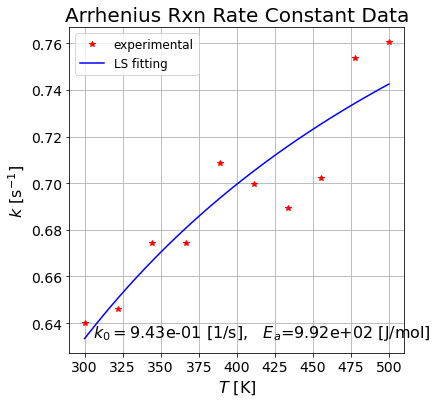

In [10]:
'''Plot the fit in the Cartesian plane'''

plot_fit(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### [Goodness of Fit](#toc)<a id="gof10"></a>

There are different ways to evaluate the goodness of fit. Below is the most direct and relevant error evaluation.
That is, the error on fitting the data as given.

In [11]:
'''Relative error on reaction rate constant values'''

print('Relative Error:')

error = np.abs(k_cte_vec - arrhenius_func(beta_vec, param_vec))/k_cte_vec*100

mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min  [%%] = %1.2f, %1.2f'%(emax,emin))

Relative Error:
mean [%] = 1.89
std  [%] = 1.05
max, min  [%] = 3.81, 0.77


### [Objective Function](#toc)<a id="of10"></a>

Let's show graphically that 

\begin{equation*}
\phi(\alphabf^*) = \min\limits_{\alphabf} \norm{\rvec}^2 ,
\end{equation*}

that is, the minimum sits at the bottom of the objective function surface.

Information on `matplotlib` plots in 3D is found [here](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

In [12]:
'''Examining the residual'''

r_vec = k_cte_vec - arrhenius_func( beta_vec, param_vec )
phi = np.linalg.norm(r_vec)**2
# phi_ls = np.dot(r_vec,r_vec) # alternative dot product

import math
print('phi(x_LS)       = %8.5e'%phi)
print('sqrt(phi(x_LS)) = %8.5e'%math.sqrt(phi))  # norm of the residual vector
print('Mean(r_vec)     = %8.5e'%np.mean(r_vec))
print('STD(r_vec)      = %8.5e'%np.std(r_vec))
print('Goodness of fit = %8.5e'%math.sqrt(phi/n_pts))

phi(x_LS)       = 2.35459e-03
sqrt(phi(x_LS)) = 4.85241e-02
Mean(r_vec)     = 5.97872e-06
STD(r_vec)      = 1.53447e-02
Goodness of fit = 1.53447e-02


In [13]:
'''Function: objective function around the minimum'''

def get_objective_function_data(n_plot_pts, arrhenius_func, beta_vec, k_cte_vec, params_vec):
    
    import numpy as np
    
    # create the objective function array
    k_0_pts    = np.linspace( 0.95*params_vec[0], params_vec[0]*1.05, n_plot_pts )
    energy_pts = np.linspace( 0.95*params_vec[1], params_vec[1]*1.05, n_plot_pts )
    
    phi = np.zeros((n_plot_pts,n_plot_pts))
    
    i = -1
    for k_0 in k_0_pts:
        i += 1
        j = -1
        for e_a in energy_pts:
            j += 1
            res = k_cte_vec - arrhenius_func( beta_vec, np.array( [k_0,e_a] ) )
            phi[i,j] = np.dot(res,res)
            
    return (k_0_pts, energy_pts, phi)

In [14]:
'''Function: plot the objective function around the minimum'''

def plot_objective_function( objective_function_data, param_vec, delta_factor=1.0 ):
    
    (k_0_pts, energy_pts, phi) = objective_function_data # unpack the data
            
    # 3D-plot the surface of the objective function
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D

    #fig = plt.figure(3,figsize=(6, 6))
    
    #ax = Axes3D(fig)
    
    #ax.plot_surface( k_0_pts, energy_pts, phi, rstride=1, cstride=1, cmap=cm.viridis )
    #ax.plot_surface( k_0_pts, energy_pts, phi, cmap=cm.viridis )
    
    #ax.view_init(azim=10)

    #ax.set_xlabel(r'$\ln k_0$ [ ]',fontsize=16)
    #ax.set_ylabel(r'$E_a$ [J/mol]',fontsize=16)
    #ax.set_zlabel(r'$\phi$',fontsize=16)

    #plt.show()
    
    # plot the contour curves of the objective function
    from matplotlib import ticker, cm
    fig, ax = plt.subplots(figsize=(6, 6))
    
    delta = np.min(np.min(phi))/100.0 * delta_factor # 0.06% variation near the minimum
    
    cv = np.linspace( np.min(np.min(phi))+delta, np.max(np.max(phi)), 10 );
    
    cs = ax.contour(k_0_pts, energy_pts, phi, cv)
    
    xpos = param_vec[0]
    ypos = param_vec[1]
    
    plt.text(xpos,ypos,r'* ($k_0$=%5.2e, $E_a$=%5.2e)'%(param_vec[0],param_vec[1]),color='r',fontsize=12);
    
    plt.xlabel(r'$k_0$ []',fontsize=14)
    plt.ylabel(r'$E_a$ [J/mol]',fontsize=14)

    plt.show()
    return

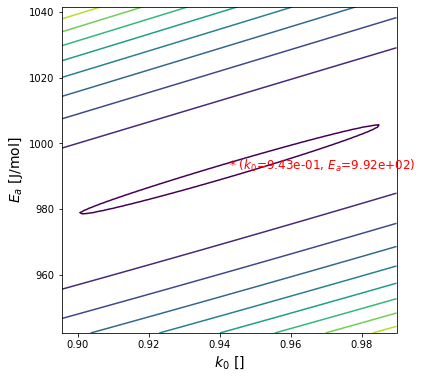

In [15]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, arrhenius_func, beta_vec, k_cte_vec, param_vec)

plot_objective_function( objective_function_data, param_vec )

In [16]:
'''Plot the objective function around the minimum'''
#!pip install plotly

(x_vec, y_vec, z_mtrx) = objective_function_data

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

data = [ go.Surface(z=z_mtrx) ]
layout = go.Layout(
        title='Objective Function Surface',
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )

plotly.offline.iplot({
    "data": data,
    "layout": layout
})

## [Experimental Data (20 points)](#toc)<a id="ed20"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_20pts.dat`:
```
#(T,k) [K x 1/s]
r_cte = 8.314 [J/(mol.K)]
n_pts = 20
3.00000e+02 6.46842e-01
3.10526e+02 6.51310e-01
3.21053e+02 6.30482e-01
3.31579e+02 6.07467e-01
3.42105e+02 6.85455e-01
3.52632e+02 7.00184e-01
3.63158e+02 7.39440e-01
3.73684e+02 6.89361e-01
3.84211e+02 7.06639e-01
3.94737e+02 6.56265e-01
4.05263e+02 6.97063e-01
4.15789e+02 7.27683e-01
4.26316e+02 6.89620e-01
4.36842e+02 7.26620e-01
4.47368e+02 6.98762e-01
4.57895e+02 7.24678e-01
4.68421e+02 7.63007e-01
4.78947e+02 8.17275e-01
4.89474e+02 7.30909e-01
5.00000e+02 7.32861e-01
```

In [17]:
'''Read experimental data'''

(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_20pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  20
T = [300.   310.53 321.05 331.58 342.11 352.63 363.16 373.68 384.21 394.74
 405.26 415.79 426.32 436.84 447.37 457.89 468.42 478.95 489.47 500.  ]
k = [0.64 0.67 0.67 0.68 0.68 0.69 0.69 0.71 0.66 0.68 0.73 0.73 0.7  0.7
 0.7  0.74 0.75 0.7  0.75 0.73]


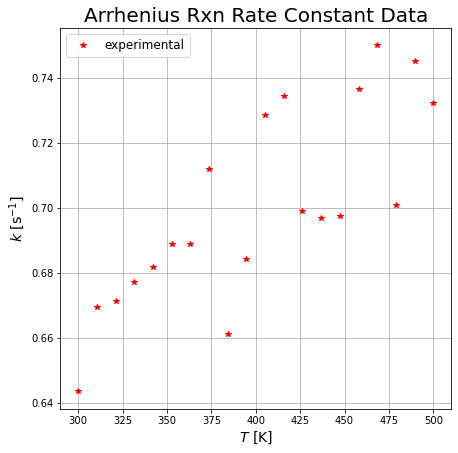

In [18]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### [Non-Linear System](#toc)<a id="nls20"></a>

Similar as [before](#nls10) with 10 points.

### [Non-Linear Least-Squares Newton's Method Data Fitting](#toc)<a id="nlls20"></a>

Similar as [before](#nlls10) with 10 points.

In [19]:
k_0      = 1.0
energy_a = 0.0

beta_vec = 1./r_cte/temp_vec
param_vec_0 = np.array([k_0,energy_a])

k_max = 8
tolerance = 1.0e-6

param_vec = newton_solve(beta_vec, k_cte_vec, 
                         arrhenius_func, partial_p_arrhenius_func,
                         param_vec_0, k_max, tolerance)

k_0      = param_vec[0]
energy_a = param_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)



**************************************************************************
                      Newton's Method Iterations                          
**************************************************************************
k  ||r(p_k)||  ||J(p_k)||  ||J^T r(p_k)||  ||del p_k||   ||p_k||  |convg| 
--------------------------------------------------------------------------
 1  +1.64e-01   +4.47e+00       +6.30e-01    +4.80e+02 +4.80e+02     0.26
 2  +7.87e-02   +3.86e+00       +9.94e-03    +2.00e+02 +6.80e+02     0.86
 3  +7.86e-02   +3.63e+00       +1.87e-05    +9.38e+00 +6.89e+02     0.42
 4  +7.86e-02   +3.62e+00       +6.57e-11    +7.06e-03 +6.89e+02    -2.21
 5  +7.86e-02   +3.62e+00       +3.29e-11    +1.18e-06 +6.89e+02     2.75
 6  +7.86e-02   +3.62e+00       +3.24e-11    +5.92e-07 +6.89e+02     1.05
******************************************************
Root =  [  0.87 689.5 ]
k_0 = 8.65108e-01 [1/s]
E_a = 6.89497e+02 [J/mol]


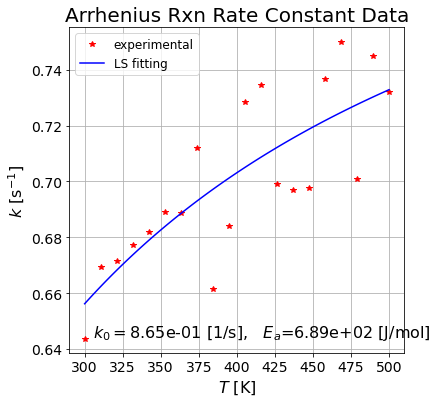

In [20]:
'''Plot the fit in the Cartesian plane'''

plot_fit(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### [Goodness of Fit](#toc)<a id="gof20"></a>

There are different ways to evaluate the goodness of fit. Below is the most direct and relevant error evaluation.
That is, the error on fitting the data as given.

In [21]:
'''Relative error on reaction rate constant values'''

print('Relative Error:')
error = np.abs(k_cte_vec - arrhenius_func( beta_vec, param_vec ))/k_cte_vec*100
mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min  [%%] = %1.2f, %1.2f'%(emax,emin))

Relative Error:
mean [%] = 2.07
std  [%] = 1.40
max, min  [%] = 5.41, 0.06


### [Objective Function](#toc)<a id="of20"></a>

Let's show graphically that 

\begin{equation*}
\phi(\alphabf^*) = \min\limits_{\alphabf} \norm{\rvec}^2 ,
\end{equation*}

that is, the minimum sits at the bottom of the objective function surface.

Information on `matplotlib` plots in 3D is found [here](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

In [22]:
'''Examining the residual'''

r_vec = k_cte_vec - arrhenius_func( beta_vec, param_vec )
phi = np.linalg.norm(r_vec)**2
# phi_ls = np.dot(r_vec,r_vec) # alternative dot product

import math
print('phi(x_LS)       = %8.5e'%phi)
print('sqrt(phi(x_LS)) = %8.5e'%math.sqrt(phi))  # norm of the residual vector
print('Mean(r_vec)     = %8.5e'%np.mean(r_vec))
print('STD(r_vec)      = %8.5e'%np.std(r_vec))
print('Goodness of fit = %8.5e'%math.sqrt(phi/n_pts))

phi(x_LS)       = 6.18303e-03
sqrt(phi(x_LS)) = 7.86323e-02
Mean(r_vec)     = -7.72047e-08
STD(r_vec)      = 1.75827e-02
Goodness of fit = 1.75827e-02


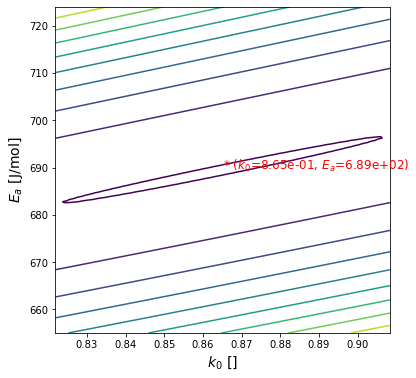

In [23]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, arrhenius_func, beta_vec, k_cte_vec, param_vec)

plot_objective_function( objective_function_data, param_vec, delta_factor = 0.4 )

In [24]:
'''Plot the objective function around the minimum'''
#!pip install plotly

(x_vec, y_vec, z_mtrx) = objective_function_data

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

data = [ go.Surface(z=z_mtrx) ]
layout = go.Layout(
        title='Objective Function Surface',
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )

plotly.offline.iplot({
    "data": data,
    "layout": layout
})

## [Experimental Data (80 points)](#toc)<a id="ed80"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_80pts.dat`.

In [25]:
'''Read experimental data'''

import numpy as np

(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_80pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  80
T = [300.   302.53 305.06 307.6  310.13 312.66 315.19 317.72 320.25 322.79
 325.32 327.85 330.38 332.91 335.44 337.98 340.51 343.04 345.57 348.1
 350.63 353.17 355.7  358.23 360.76 363.29 365.82 368.35 370.89 373.42
 375.95 378.48 381.01 383.54 386.08 388.61 391.14 393.67 396.2  398.73
 401.27 403.8  406.33 408.86 411.39 413.92 416.46 418.99 421.52 424.05
 426.58 429.11 431.65 434.18 436.71 439.24 441.77 444.3  446.83 449.37
 451.9  454.43 456.96 459.49 462.02 464.56 467.09 469.62 472.15 474.68
 477.21 479.75 482.28 484.81 487.34 489.87 492.4  494.94 497.47 500.  ]
k = [0.66 0.64 0.65 0.67 0.66 0.64 0.68 0.66 0.67 0.67 0.67 0.67 0.68 0.68
 0.67 0.68 0.69 0.68 0.68 0.66 0.69 0.66 0.69 0.68 0.68 0.69 0.68 0.68
 0.7  0.69 0.7  0.7  0.7  0.73 0.69 0.72 0.7  0.69 0.71 0.69 0.7  0.7
 0.7  0.7  0.71 0.72 0.71 0.69 0.73 0.73 0.71 0.71 0.7  0.73 0.74 0.73
 0.73 0.71 0.72 0.72 0.71 0.73 0.75 0.72 0.73 0.74 0.73 0.72 0.73 0.73
 0.73 0.75 0.71 0.76 0.75 0.77 0.74 0.73

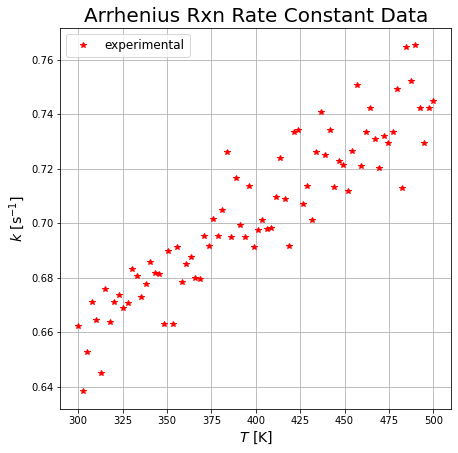

In [26]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### [Non-Linear System](#toc)<a id="nls80"></a>

Similar as [before](#nls10) with 10 points.

### [Non-Linear Least-Squares Newton's Method Data Fitting](#toc)<a id="nlls80"></a>

Similar as [before](#nlls10) with 10 points.

In [27]:
k_0      = 1.0
energy_a = 0.0

beta_vec = 1./r_cte/temp_vec
param_vec_0 = np.array([k_0,energy_a])

k_max = 8
tolerance = 1.0e-6

param_vec = newton_solve(beta_vec, k_cte_vec, 
                         arrhenius_func, partial_p_arrhenius_func,
                         param_vec_0, k_max, tolerance)

k_0      = param_vec[0]
energy_a = param_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)



**************************************************************************
                      Newton's Method Iterations                          
**************************************************************************
k  ||r(p_k)||  ||J(p_k)||  ||J^T r(p_k)||  ||del p_k||   ||p_k||  |convg| 
--------------------------------------------------------------------------
 1  +3.28e-01   +8.94e+00       +2.73e+00    +5.67e+02 +5.67e+02     0.27
 2  +1.03e-01   +7.52e+00       +3.93e-02    +2.34e+02 +8.01e+02     0.86
 3  +1.03e-01   +7.00e+00       +1.69e-04    +1.24e+01 +8.13e+02     0.46
 4  +1.03e-01   +6.98e+00       +5.44e-09    +4.10e-02 +8.13e+02    -1.27
 5  +1.03e-01   +6.98e+00       +1.91e-14    +9.66e-05 +8.13e+02     2.89
 6  +1.03e-01   +6.98e+00       +1.90e-15    +2.28e-07 +8.13e+02     1.65
******************************************************
Root =  [  0.9  813.49]
k_0 = 9.02980e-01 [1/s]
E_a = 8.13495e+02 [J/mol]


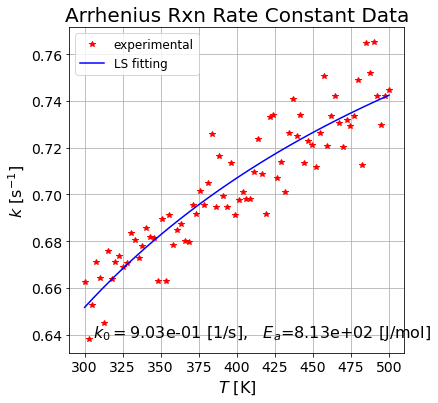

In [28]:
'''Plot the fit in the Cartesian plane'''

plot_fit(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### [Goodness of Fit](#toc)<a id="gof80"></a>

There are different ways to evaluate the goodness of fit. Below is the most direct and relevant error evaluation.
That is, the error on fitting the data as given.

In [29]:
'''Relative error on reaction rate constant values'''

print('Relative Error:')
error = np.abs(k_cte_vec - arrhenius_func(beta_vec, param_vec))/k_cte_vec*100
mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min  [%%] = %1.2f, %1.2f'%(emax,emin))

Relative Error:
mean [%] = 1.30
std  [%] = 0.97
max, min  [%] = 3.64, 0.00


### [Objective Function](#toc)<a id="of80"></a>

Let's show graphically that 

\begin{equation*}
\phi(\alphabf^*) = \min\limits_{\alphabf} \norm{\rvec}^2 ,
\end{equation*}

that is, the minimum sits at the bottom of the objective function surface.

Information on `matplotlib` plots in 3D is found [here](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

In [30]:
'''Examining the residual'''

r_vec = k_cte_vec - arrhenius_func(beta_vec, param_vec)
phi = np.linalg.norm(r_vec)**2
# phi_ls = np.dot(r_vec,r_vec) # alternative dot product

import math
print('phi(x_LS)       = %8.5e'%phi)
print('sqrt(phi(x_LS)) = %8.5e'%math.sqrt(phi))  # norm of the residual vector
print('Mean(r_vec)     = %8.5e'%np.mean(r_vec))
print('STD(r_vec)      = %8.5e'%np.std(r_vec))
print('Goodness of fit = %8.5e'%math.sqrt(phi/n_pts))

phi(x_LS)       = 1.05684e-02
sqrt(phi(x_LS)) = 1.02803e-01
Mean(r_vec)     = 1.13956e-06
STD(r_vec)      = 1.14937e-02
Goodness of fit = 1.14937e-02


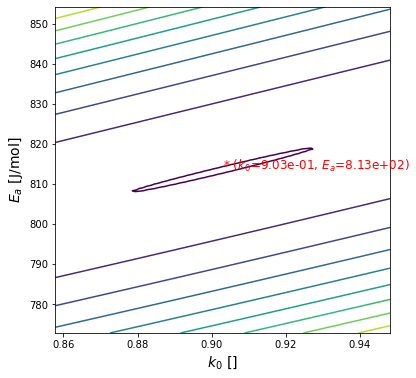

In [31]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, arrhenius_func, beta_vec, k_cte_vec, param_vec)

plot_objective_function(objective_function_data, param_vec, delta_factor = 0.4)

In [32]:
'''Plot the objective function around the minimum'''
#!pip install plotly

(x_vec, y_vec, z_mtrx) = objective_function_data

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

data = [ go.Surface(z=z_mtrx) ]
layout = go.Layout(
        title='Objective Function Surface',
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )

plotly.offline.iplot({
    "data": data,
    "layout": layout
})

## [Results Comparison NLLSq Method](#toc)<a id="res"></a>

|            Parameters                 |  10 pts  |  20 pts  | 80 pts   |
| ------------------------------------- | -------- | -------  | -------- |
| Pre-exponential factor, $k_0$, 1/s    | 9.42e-01 | 8.65e-01 | 9.03e-01 |
| Energy of activation, $E_a$, J/mol    | 9.92e+02 | 6.89e+02 | 8.13e+02 |
| Relative error mean [%]               | 1.89     | 2.07     | 1.30     |
| Relative error std  [%]               | 1.05     | 1.40     | 0.97     |
| Max. relative error [%]               | 3.81     | 5.41     | 3.64     |

## [Results Comparison LLSq Method Notebook 11](#toc)<a id="res"></a>

|            Parameters                 |  10 pts  |  20 pts  | 80 pts   |
| ------------------------------------- | -------- | -------  | -------- |
| Pre-exponential factor, $k_0$, 1/s    | 9.38e-01 | 8.64e-01 | 9.02e-01 |
| Energy of activation, $E_a$, J/mol    | 9.76e+02 | 6.88e+02 | 8.09e+02 |
| Relative error mean [%]               | 1.89     | 2.08     | 1.29     |
| Relative error std [%]                | 1.05     | 1.40     | 0.97     |
| Max. relative error [%]               | 3.74     | 5.38     | 3.65     |